In [1]:
import pandas as pd 
import numpy as np

data = pd.read_csv('Airlines_graph.csv')

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
data.shape


data.dtypes

year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
dtype: object

In [3]:
nx.__version__

'3.0'

In [4]:
# converting sched_dep_time to 'std' - Scheduled time of departure
data['std'] = data.sched_dep_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_dep_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

C:\Users\yomaa\AppData\Local\Temp\ipykernel_7348\3093572283.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['std'] = data.sched_dep_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_dep_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'


In [5]:
# converting sched_arr_time to 'sta' - Scheduled time of arrival
data['sta'] = data.sched_arr_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_arr_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

# converting dep_time to 'atd' - Actual time of departure
data['atd'] = data.dep_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.dep_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

C:\Users\yomaa\AppData\Local\Temp\ipykernel_7348\4019421568.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['sta'] = data.sched_arr_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_arr_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'
C:\Users\yomaa\AppData\Local\Temp\ipykernel_7348\4019421568.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data['atd'] = data.dep_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.dep_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'


In [6]:
# converting arr_time to 'ata' - Actual time of arrival
data['ata'] = data.arr_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.arr_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

C:\Users\yomaa\AppData\Local\Temp\ipykernel_7348\707532253.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['ata'] = data.arr_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.arr_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'


In [7]:
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

In [8]:
# finally we drop the columns we don't need
data = data.drop(columns = ['year', 'month', 'day'])

In [9]:
FG = nx.from_pandas_edgelist(data, source='origin', target='dest', edge_attr=True,)

In [10]:
FG.nodes()

NodeView(('EWR', 'MEM', 'LGA', 'FLL', 'SEA', 'JFK', 'DEN', 'ORD', 'MIA', 'PBI', 'MCO', 'CMH', 'MSP', 'IAD', 'CLT', 'TPA', 'DCA', 'SJU', 'ATL', 'BHM', 'SRQ', 'MSY', 'DTW', 'LAX', 'JAX', 'RDU', 'MDW', 'DFW', 'IAH', 'SFO', 'STL', 'CVG', 'IND', 'RSW', 'BOS', 'CLE'))

In [11]:
FG.edges()

EdgeView([('EWR', 'MEM'), ('EWR', 'SEA'), ('EWR', 'MIA'), ('EWR', 'ORD'), ('EWR', 'MSP'), ('EWR', 'TPA'), ('EWR', 'MSY'), ('EWR', 'DFW'), ('EWR', 'IAH'), ('EWR', 'SFO'), ('EWR', 'CVG'), ('EWR', 'IND'), ('EWR', 'RDU'), ('EWR', 'IAD'), ('EWR', 'RSW'), ('EWR', 'BOS'), ('EWR', 'PBI'), ('EWR', 'LAX'), ('EWR', 'MCO'), ('EWR', 'SJU'), ('LGA', 'FLL'), ('LGA', 'ORD'), ('LGA', 'PBI'), ('LGA', 'CMH'), ('LGA', 'IAD'), ('LGA', 'CLT'), ('LGA', 'MIA'), ('LGA', 'DCA'), ('LGA', 'BHM'), ('LGA', 'RDU'), ('LGA', 'ATL'), ('LGA', 'TPA'), ('LGA', 'MDW'), ('LGA', 'DEN'), ('LGA', 'MSP'), ('LGA', 'DTW'), ('LGA', 'STL'), ('LGA', 'MCO'), ('LGA', 'CVG'), ('LGA', 'IAH'), ('FLL', 'JFK'), ('SEA', 'JFK'), ('JFK', 'DEN'), ('JFK', 'MCO'), ('JFK', 'TPA'), ('JFK', 'SJU'), ('JFK', 'ATL'), ('JFK', 'SRQ'), ('JFK', 'DCA'), ('JFK', 'DTW'), ('JFK', 'LAX'), ('JFK', 'JAX'), ('JFK', 'CLT'), ('JFK', 'PBI'), ('JFK', 'CLE'), ('JFK', 'IAD'), ('JFK', 'BOS')])

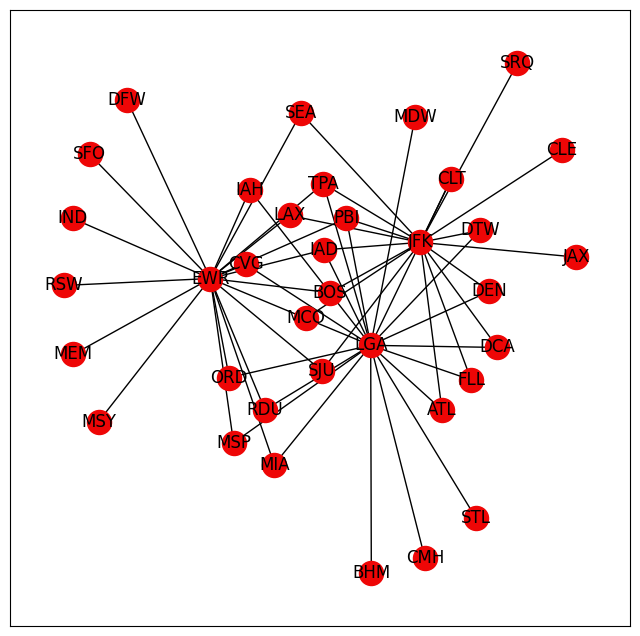

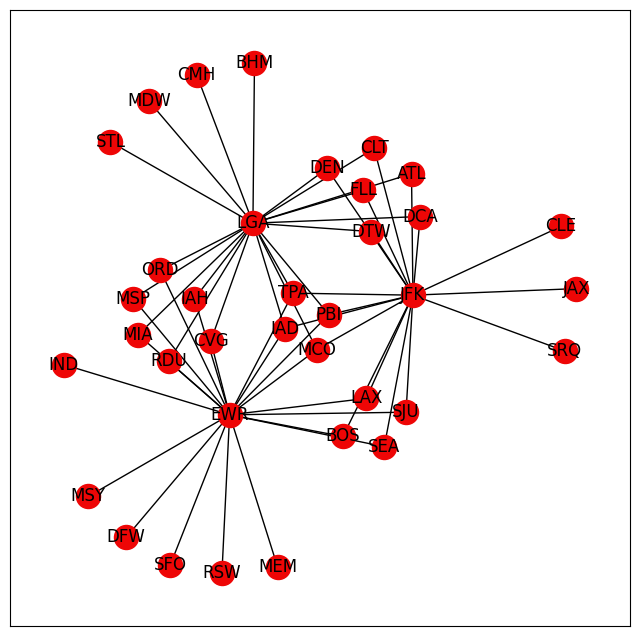

In [17]:
# your code is here (Quick view of the Graph.)
fig,axs = plt.subplots(figsize=(8,8))
nx.draw_networkx(FG,ax=axs,with_labels=True,node_color="#ee0606")

In [20]:
nx.algorithms.degree_centrality(FG) # Notice the 3 airports from which all of our 100 rows of data originates
# Calculate average edge density of the Graph

# your code is here
density = nx.density(FG)
density

0.09047619047619047

In [21]:
nx.average_shortest_path_length(FG) # Average shortest path length for ALL paths in the Graph

2.36984126984127

In [22]:
nx.average_degree_connectivity(FG) # For a node of degree k - What is the average of its neighbours' degree?

{20: 1.95, 1: 19.307692307692307, 2: 19.0625, 17: 2.0588235294117645, 3: 19.0}

In [23]:
# Let us find all the paths available
for path in nx.all_simple_paths(FG, source='JAX', target='DFW'):
 print(path)

['JAX', 'JFK', 'DEN', 'LGA', 'ORD', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'PBI', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'IAD', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MIA', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'RDU', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'TPA', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MSP', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MCO', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'CVG', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'IAH', 'EWR', 'DFW']
['JAX', 'JFK', 'SEA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'ORD', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'PBI', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'IAD', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'MIA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'RDU', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'TPA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'MSP', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'CVG', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'IAH', 'EWR', 'DFW']
['JAX', 'JFK',

In [24]:
# Let us find the dijkstra path from JAX to DFW.
# You can read more in-depth on how dijkstra works from this resource - https://courses.csail.mit.edu/6.006/fall11/lectures/lecture16.pdf
dijpath = nx.dijkstra_path(FG, source='JAX', target='DFW')
dijpath

['JAX', 'JFK', 'SEA', 'EWR', 'DFW']

In [25]:
# Let us try to find the dijkstra path weighted by airtime (approximate case)
shortpath = nx.dijkstra_path(FG, source='JAX', target='DFW', weight='air_time')
shortpath

['JAX', 'JFK', 'BOS', 'EWR', 'DFW']

### ASSIGNMENT-4 (100 Points)

Please use the Airlines_graph.csv for the following questions.

1. Please fill "your code here" sections on above cells (10 Points).

2. How many maximal cliques we can spot in this airline network? (20 Points)

3. List the most busiest/popular airport. (20 Points) 

4. As a thought leader, identify 6 new routes to recommend. Hint: Think if the pairs are symmetric or not and make your assumption/observation accordingly i.e. whether ORD-LAX and LAX-ORD two separate routes? (50 Points)



### Question 2

1. We can use networkx to find a list of maximal cliques.

In [50]:
n_cliques = list(nx.find_cliques(FG))
print(n_cliques)

[['CLE', 'JFK'], ['LGA', 'DEN'], ['LGA', 'MSP'], ['LGA', 'CVG'], ['LGA', 'FLL'], ['LGA', 'CLT'], ['LGA', 'ATL'], ['LGA', 'TPA'], ['LGA', 'IAH'], ['LGA', 'MDW'], ['LGA', 'DTW'], ['LGA', 'MIA'], ['LGA', 'MCO'], ['LGA', 'BHM'], ['LGA', 'RDU'], ['LGA', 'STL'], ['LGA', 'PBI'], ['LGA', 'CMH'], ['LGA', 'ORD'], ['LGA', 'IAD'], ['LGA', 'DCA'], ['MSY', 'EWR'], ['SRQ', 'JFK'], ['SFO', 'EWR'], ['JAX', 'JFK'], ['JFK', 'MCO'], ['JFK', 'DEN'], ['JFK', 'LAX'], ['JFK', 'SEA'], ['JFK', 'PBI'], ['JFK', 'SJU'], ['JFK', 'FLL'], ['JFK', 'CLT'], ['JFK', 'IAD'], ['JFK', 'DCA'], ['JFK', 'ATL'], ['JFK', 'TPA'], ['JFK', 'BOS'], ['JFK', 'DTW'], ['SEA', 'EWR'], ['SJU', 'EWR'], ['MEM', 'EWR'], ['BOS', 'EWR'], ['DFW', 'EWR'], ['RSW', 'EWR'], ['LAX', 'EWR'], ['EWR', 'MCO'], ['EWR', 'RDU'], ['EWR', 'MSP'], ['EWR', 'CVG'], ['EWR', 'PBI'], ['EWR', 'ORD'], ['EWR', 'IAD'], ['EWR', 'TPA'], ['EWR', 'IAH'], ['EWR', 'IND'], ['EWR', 'MIA']]


In [52]:
for i in n_cliques:
    if len(i) > 2:
        print(i)

2. As we can see, all given cliques are only 2 nodes in length, thus showing that there is no maximal clique in the graph.

### Question 3

1. First let us define, what the busiest airport would be: The busiest airport would probably be an airport that is either visited the most, or an origin airport with the most travel froms.
2. Let us now take a look at the airports, and their frequencies.

In [77]:
airport,counts = list(data["origin"].value_counts().index.values) + list(data["dest"].value_counts().index.values),list(data["origin"].value_counts().values) + list(data["dest"].value_counts().values)
# dest_airport,dest_counts = data["dest"].value_counts().index.values,data["dest"].value_counts().values
busiest_df = pd.DataFrame({"Airports" : airport,"Visitation Counts" : counts})

busiest_df.sort_values(by="Visitation Counts",ascending=False)


,Airports,Visitation Counts
0,LGA,42
1,EWR,31
2,JFK,27
3,LAX,7
4,ATL,7
5,IAH,6
6,ORD,6
7,PBI,5
9,MSP,5
10,MIA,5


3. We can thus see, that LGA has had the most number of flights either leave from it or arrive at it, and thus it is the most busiest/popular airport.
4. We can now 

### Question 4
1. Let us take a look at the most popular routes first.

In [81]:
routes = data[["origin","dest"]].value_counts().sort_values(ascending=False)
popular_routes = routes[routes>2]
popular_routes

origin  dest
LGA     ORD     5
JFK     LAX     5
LGA     ATL     5
EWR     MSP     4
        IAH     4
LGA     TPA     3
        RDU     3
        PBI     3
        MIA     3
        CLT     3
dtype: int64

2. We can see that LGA -> ORD , JFK -> LAX , LGA -> ATL, EWR -> MSP and EWR -> IAH are the most popular routes.
3. Considering that these flights are all one way, and that customers would also like to fly back, it would be wise to have a route back. i.e.
    1. ORD -> LGA
    2. LAX -> JFK
    3. ATL -> LGA
    4. MSP -> EWR
    5. IAH -> EWR
4. other than this, we can also look for destinations that are connected the least, but have a high number of flights.
    1. let us first find the least connected flights, or otherwise flights with only 1 degree

In [91]:
lowest_degree = [nodes for (nodes,val) in FG.degree() if val == 1]
lowest_degree

['MEM',
 'CMH',
 'BHM',
 'SRQ',
 'MSY',
 'JAX',
 'MDW',
 'DFW',
 'SFO',
 'STL',
 'IND',
 'RSW',
 'CLE']

5. Let us now find the most popular destinations from the least connected destinations

In [105]:
popular_dest = data[["dest"]].value_counts()
popular_dest[lowest_degree].sort_values(ascending=False)

dest
JAX     2
DFW     2
SFO     2
STL     2
MEM     1
CMH     1
BHM     1
SRQ     1
MSY     1
MDW     1
IND     1
RSW     1
CLE     1
dtype: int64

6. Unfortunately as we can see these routes are not very popular. Let us instead take a look at destinations, that receive flights from 2 different origins.

In [106]:
second_degree = [nodes for (nodes,val) in FG.degree() if val == 2]
second_degree

['FLL',
 'SEA',
 'DEN',
 'ORD',
 'MIA',
 'MSP',
 'CLT',
 'DCA',
 'SJU',
 'ATL',
 'DTW',
 'LAX',
 'RDU',
 'IAH',
 'CVG',
 'BOS']

7. let us take a look at the most popular routes from the above destinations.

In [107]:
popular_dest[second_degree].sort_values(ascending=False)

dest
ATL     7
LAX     7
ORD     6
IAH     6
MIA     5
MSP     5
CLT     4
RDU     4
FLL     3
DCA     3
SJU     3
DTW     3
CVG     3
SEA     2
DEN     2
BOS     2
dtype: int64

8. let us take a look at the routes that are servicing ATX and LAX

In [118]:
for i in FG.edges():
    if ("ATL" in i) or ("LAX" in i):
        print(i)

('EWR', 'LAX')
('LGA', 'ATL')
('JFK', 'ATL')
('JFK', 'LAX')


9. We can see that EWR and JFK have routes to LAX, so we should add a route from JFK to LAX, and LGA and JFK have routes to ATL, so we should add a route from EWR to ATL
10. Thus the routes are:
    1. ORD -> LGA
    2. LAX -> JFK
    3. ATL -> LGA
    4. MSP -> EWR
    5. IAH -> EWR
    6. JFK -> LAX
    7. EWR -> ATL
11. We can think about adding a return route from JFK -> LAX and EWR -> ATL, after monitoring the success of the previous routes first. 